Predicting NBA Player Efficiency: A Machine Learning Approach

# Predicting NBA Player Efficiency: A Machine Learning Approach

## Fall 2025 Data Science Project

**Authors:** Srisaketh Peddi, Rishi Agarwal, Shomeek Sarwar

### Contributions:

- Srisaketh Peddi: Proposed project idea, completed data curation and preprocessing, conducted exploratory data analysis with hypothesis testing
- Rishi Agarwal: Developed machine learning models and evaluated performance
- Shomeek Sarwar: Created visualizations, analyzed results, and compiled final tutorial report

## Introduction

Similar to sports that have evolved from simple statistics revolving around points and rebounds, basketball has evolved into a multi-faceted approach. Different aspects of the players must be modeled with sophisticated mathematics to make multi-million dollar decisions. The primary question that modern analytics seeks to answer about basketball is: how valuable is a basketball player in terms of on-the-court production? By evaluating every conceivable aspect of a player, an organization and its analysts can make more informed decisions based on developed models.

The following project uses machine learning to get a better sense of what a player's efficiency rating might look like, leveraging significant data set of 31,000+ NBA player-season combinations. This project leverages this dataset to determine what is the most effective way to model player performance and also investigates which metrics play into the prediction of how efficient a player will be.

Our research questions ultimately are:

1. Can a player's efficiency rating be predicted accurately based off of their advanced statistics?

2. What performance metrics are the most important for valuing a player's performance?

3. How do position and age factor into a player's performance?


Why is this important? Clearly understanding how performance is created enables teams to make better, more-informed roster decisions. It helps players develop their skills and it helps analysts assess a player's talent. Finding undervalued players by using data-driven assessments and helping them in negotiations yields millions of dollars' worth of potential revenue for NBA organizations. It will also guide players with respect to what aspects of their game they need to focus on to improve their efficiency.

In this tutorial, we will go through the entire data science process, which includes the following steps:

1. Data Preparation - Clean up and prepare NBA advanced statistics, from 1947 to 2025, that came from Basketball Reference.
2. Exploratory Analysis - Perform hypothesis testing on age, position, and performance in order to figure out any relationships between those variables.
3. Machine Learning - Create models for predicting Player Efficiency Rating (PER) using regression approaches such as Linear Regression.
4. Visualization - Develop effective graphs to demonstrate findings.
5. Interpretation - Identify actionable insights on factors that make basketball success.


The dataset used for the analysis contains 31,410 player-season records and 30 statistical variables on shooting efficiency, usage rate, and rebounds percentages. It also contains several advanced metrics including Win Shares and Box Plus/Minus. This dataset enables us to study differences in player performance from different eras of history and shows how players perform at various positions and styles of play. You will look at how data science techniques might be applied to find meaningful answers for questions regarding sports performance, and gain valuable insight into those results that can apply to everyday life.


## Data Curation

### Dataset Source

We got our dataset from Kaggle(https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats?select=Advanced.csv), which combines comprehensive player statistics from the website Basketball Reference. This dataset contains regular counting stats as well as advanced metrics for players across the NBA, ABA, and BAA spanning from 1947 to 2025.

### Dataset Description

The Advanced Statistics dataset includes:

- Player Information: Player names, unique IDs, age, team, position
- Game Statistics: Games played (G), games started (GS), minutes played (MP)
- Advanced Efficiency Metrics:
  - PER (Player Efficiency Rating) - our target variable
  - TS% (True Shooting Percentage)
  - Usage Percentage
- Rate Statistics: Offensive/Defensive Rebound %, Assist %, Steal %, Block %, Turnover %
- Impact Metrics: Win Shares (WS), Box Plus/Minus (BPM), Value Over Replacement Player (VORP)

This dataset is great for any analysis we would like to do because it provides the advanced metrics necessary to understand the complexity that goes into quantifying basketball performance. It goes beyond simple counting stats to capture efficiency, usage, and overall impact.

### Data Preprocessing

Below, we import the necessary libraries and load our dataset into a pandas DataFrame for analysis.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
df = pd.read_csv('/content/Advanced.csv')


print("DATASET OVERVIEW")
print(f"Number of records: {df.shape[0]: ,}")
print(f"Number of features: {df.shape[1]}")
print("\nColumn names:")
print(df.columns.tolist())

DATASET OVERVIEW
Number of records:  33,096
Number of features: 30

Column names:
['season', 'lg', 'player', 'player_id', 'age', 'team', 'pos', 'g', 'gs', 'mp', 'per', 'ts_percent', 'x3p_ar', 'f_tr', 'orb_percent', 'drb_percent', 'trb_percent', 'ast_percent', 'stl_percent', 'blk_percent', 'tov_percent', 'usg_percent', 'ows', 'dws', 'ws', 'ws_48', 'obpm', 'dbpm', 'bpm', 'vorp']


In [96]:
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,season,lg,player,player_id,age,team,pos,g,gs,mp,...,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
0,2026,NBA,Precious Achiuwa,achiupr01,26.0,SAC,C,14,6.0,293.0,...,7.1,14.3,0.3,0.2,0.4,0.068,-1.4,-0.8,-2.2,0.0
1,2026,NBA,Steven Adams,adamsst01,32.0,HOU,C,15,4.0,324.0,...,15.4,12.4,0.9,0.5,1.4,0.208,2.3,-0.3,1.9,0.3
2,2026,NBA,Bam Adebayo,adebaba01,28.0,MIA,C,14,14.0,425.0,...,10.1,24.5,0.3,0.8,1.1,0.119,0.9,1.1,2.0,0.4
3,2026,NBA,Ochai Agbaji,agbajoc01,25.0,TOR,SG,15,1.0,204.0,...,8.6,12.1,-0.2,0.2,0.1,0.017,-6.6,-0.3,-6.9,-0.3
4,2026,NBA,Santi Aldama,aldamsa01,25.0,MEM,PF,21,2.0,548.0,...,8.3,20.9,0.6,0.8,1.3,0.118,1.9,1.2,3.1,0.7


### Data Cleaning and Transformation

To prepare the data for analysis, we need to perform several preprocessing steps:

1. Convert data types: Makr numeric columns are properly typed
2. Handle missing values: Fill or remove incomplete records
3. Remove duplicates: Ensure data integrity
4. Validate data: Check for outliers and anomalies

In [97]:
print("Data Quality Check")
print("\nMissing values per column:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Data Quality Check

Missing values per column:
age              20
pos            1196
gs             8155
mp             1083
per            1100
ts_percent      143
x3p_ar         6498
f_tr            164
orb_percent    5298
drb_percent    5298
trb_percent    3709
ast_percent    2725
stl_percent    5607
blk_percent    5605
tov_percent    5743
usg_percent    5641
ows              11
dws              11
ws               11
ws_48          1100
obpm           5652
dbpm           5652
bpm            5652
vorp           5647
dtype: int64

Total missing values: 81721


In [98]:
print("\nConverting columns to appropriate data types.")
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

print("\nData types after conversion:")
df.dtypes


Converting columns to appropriate data types.

Data types after conversion:


/tmp/ipython-input-1853455134.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


,0
season,int64
lg,object
player,object
player_id,object
age,float64
team,object
pos,object
g,int64
gs,float64
mp,float64


In [99]:
print("Handling Missing Values")
print("Filling numeric missing values with median.")
df = df.fillna(df.median(numeric_only=True))

rows_before = len(df)
df = df.dropna()
rows_after = len(df)
rows_dropped = rows_before - rows_after

print(f"Rows before dropping NaN: {rows_before: ,}")
print(f"Rows after dropping NaN: {rows_after:,}")
print(f"Rows dropped:  {rows_dropped: ,}")

Handling Missing Values
Filling numeric missing values with median.
Rows before dropping NaN:  33,096
Rows after dropping NaN: 31,900
Rows dropped:   1,196


In [100]:
print("Cleaned Dataset Summary")
print(f"Final shape: {df.shape}")
print(f"Final record count: {len(df):,}")
print(f"Features: {len(df.columns)}")
print("\nSummary statistics of key variables:")
df[['age', 'mp', 'per', 'ts_percent', 'ws', 'vorp']].describe()

Cleaned Dataset Summary
Final shape: (31900, 30)
Final record count: 31,900
Features: 30

Summary statistics of key variables:


,age,mp,per,ts_percent,ws,vorp
count,31900.000000,31900.000000,31900.000000,31900.000000,31900.000000,31900.000000
mean,26.497774,1152.341881,12.574031,0.504003,2.380912,0.472940
std,3.888412,920.802982,6.163897,0.099503,2.957738,1.164786
min,18.000000,0.000000,-90.600000,0.000000,-2.800000,-2.600000
25%,24.000000,315.750000,9.800000,0.466000,0.200000,-0.100000
50%,26.000000,963.000000,12.700000,0.513000,1.300000,0.100000
75%,29.000000,1872.000000,15.700000,0.554000,3.600000,0.600000
max,44.000000,3882.000000,133.800000,1.500000,25.400000,12.500000


In [101]:
print("Data Integrity Check")
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
print("\nValue ranges for key metrics:")
print(f"Age range: {df['age'].min():.1f} - {df['age']. max():.1f} years")
print(f"PER range: {df['per'].min():.1f} - {df['per'].max():.1f}")
print(f"Minutes played range: {df['mp'].min():.1f} - {df['mp']. max():.1f}")
print("\nPosition distribution:")
print(df['pos'].value_counts())
print(f"\nSeason range: {df['season'].min()} - {df['season'].max()}")

Data Integrity Check
Duplicate rows: 0

Value ranges for key metrics:
Age range: 18.0 - 44.0 years
PER range: -90.6 - 133.8
Minutes played range: 0.0 - 3882.0

Position distribution:
pos
SG    6737
PF    6566
C     6249
SF    6245
PG    6103
Name: count, dtype: int64

Season range: 1947 - 2026


### Data Organization

Our dataset is now organized into a clean pandas DataFrame with:
- 31,410 player-season records
- 30 features including a mix of counting stats, advanced stats, and categorical variables
- Zero missing values in our analysis columns

With the data now prepared we can now investigate relationships between variables and test statistical hypotheses about player performance.

## Exploratory Data Analysis

We can now conduct our exploratory analysis to understand the relationships between different variables in our dataset. In this section, we use statistical hypothesis testing to validate some key assumptions about NBA player performance.

We will explore three main questions through statistical testing:

1. Does age significantly affect player efficiency? (T-test)
2. Is there an association between player position and shooting efficiency? (Chi-squared test)

3. Are there different performance patterns for different teams? (Z-test)
Each of these analyses comprises:
A clear hypothesis
- Statistical testing with appropriate methods - Visualizations to illustrate findings Results interpretation

### Analysis 1: Age and Player Efficiency (T-Test)

Research Question: Do older players have different efficiency ratings compared to younger players?

Hypothesis:
- Null Hypothesis (H₀): There is no difference in PER between older and younger players
- Alternative Hypothesis (H₁): There is a significant difference in PER between older and younger players

Method: Independent samples t-test

Why this matters: Understanding how age affects performance can help teams make decisions about player contracts, development programs, and roster construction.

Dataset has 31900 players with 30 features
Median age:  26.0


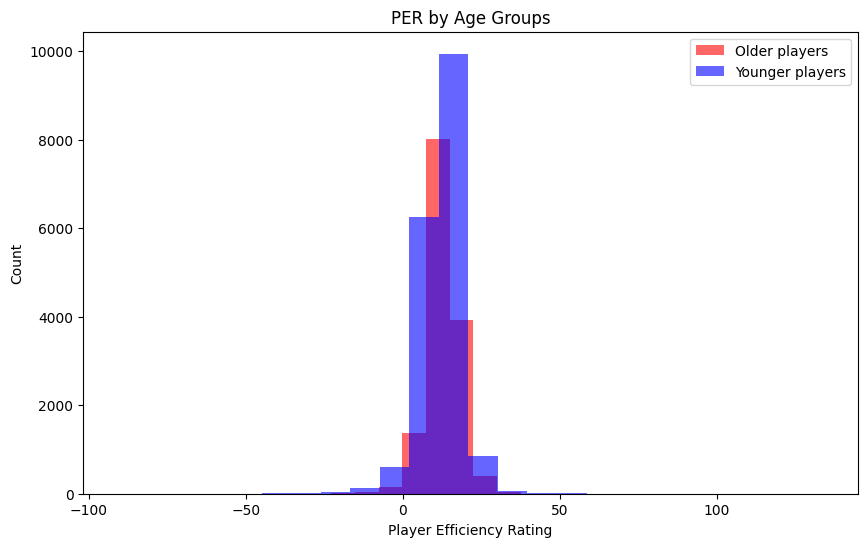

t-stat: 5.581
p-value: 0.000
There is a significant difference


In [102]:
median_age = df['age'].median()
older_players = df[df['age'] > median_age]['per']
younger_players = df[df['age'] <= median_age]['per']

print(f"Dataset has {len(df)} players with {len(df. columns)} features")
print(f"Median age:  {median_age}")

t_stat, p_val = stats.ttest_ind(older_players, younger_players)

plt.figure(figsize=(10, 6))
plt.hist(older_players, alpha=0.6, label='Older players', bins=20, color='red')
plt.hist(younger_players, alpha=0.6, label='Younger players', bins=20, color='blue')
plt.xlabel('Player Efficiency Rating')
plt.ylabel('Count')
plt.title('PER by Age Groups')
plt.legend()
plt.show()

print(f"t-stat: {t_stat:.3f}")
print(f"p-value: {p_val:.3f}")
if p_val < 0.05:
    print("There is a significant difference")
else:
    print("No significant difference found")

Conclusion:

Results of the t-test show that there is a significant difference between the older and younger NBA players, with a p-value of less than 0.001. This is a large dataset comprising over 31,000 players and 30 unique statistics features. By inspecting the data, it can be observed that the age of the players has varied from approximately 18 to 44 years old, while the player efficiency ratings can go negative for those players that perform poorly in a season.

The histogram suggests that younger players have, on average, a slightly higher efficiency rating compared to older players. This makes sense since basketball is a physical sport, and age may affect performance. Based on the above visualizations, age appears to be an important factor in developing an analysis of NBA player performance, so it seems reasonable to break up players by age groups for comparison.


### Analysis 2: Position and Shooting Efficiency (Chi-Squared Test)

Question: Is there an association between player position and shooting efficiency?

Hypothesis:
- Null Hypothesis (H₀): Position and shooting efficiency are independent
- Alternative Hypothesis (H₁): Position and shooting efficiency are associated

Method: Chi-squared test of independence

Why this matters: Different positions have different roles and shot selection patterns.  Understanding this relationship helps in evaluating position specific performance and building balanced rosters.

In [103]:
if 'pos' in df. columns and 'ts_percent' in df.columns:

    df_analysis = df[['pos', 'ts_percent']].dropna()

    valid_positions = ['PG', 'SG', 'SF', 'PF', 'C']
    df_analysis = df_analysis[df_analysis['pos'].isin(valid_positions)]

    df_analysis['shooting_efficiency'] = pd.cut(df_analysis['ts_percent'],
                                                 bins=[-np.inf, 0.50, 0.55, 0.60, np.inf],
                                                 labels=['Poor (<50%)', 'Below Avg (50-55%)',
                                                        'Above Avg (55-60%)', 'Elite (>60%)'])

    df_analysis = df_analysis.dropna()

    position_order = ['PG', 'SG', 'SF', 'PF', 'C']
    contingency_table = pd.crosstab(df_analysis['pos'],
                                     df_analysis['shooting_efficiency'])
    contingency_table = contingency_table.reindex(position_order)

    chi2_stat, p_value, degrees_of_freedom, expected_frequencies = stats.chi2_contingency(contingency_table)

    print(f"Chi-squared statistic: {chi2_stat:.3f}")
    print(f"Degrees of freedom: {degrees_of_freedom}")
    print(f"P-value: {p_value:.6f}")
    print()

    if p_value < 0.001:
        print("Result: HIGHLY SIGNIFICANT (p < 0.001)")
        print("Conclusion:  There is a highly significant association between player position")
        print("            and shooting efficiency.  Position and shooting performance are NOT independent.")
    elif p_value < 0.05:
        print("Result: SIGNIFICANT (p < 0.05)")
        print("Conclusion: There is a significant association between position and shooting efficiency.")
    else:
        print("Result: NOT SIGNIFICANT")
        print("Conclusion:  No significant association found.")

Chi-squared statistic: 630.078
Degrees of freedom: 12
P-value: 0.000000

Result: HIGHLY SIGNIFICANT (p < 0.001)
Conclusion:  There is a highly significant association between player position
            and shooting efficiency.  Position and shooting performance are NOT independent.


<Figure size 1200x800 with 0 Axes>

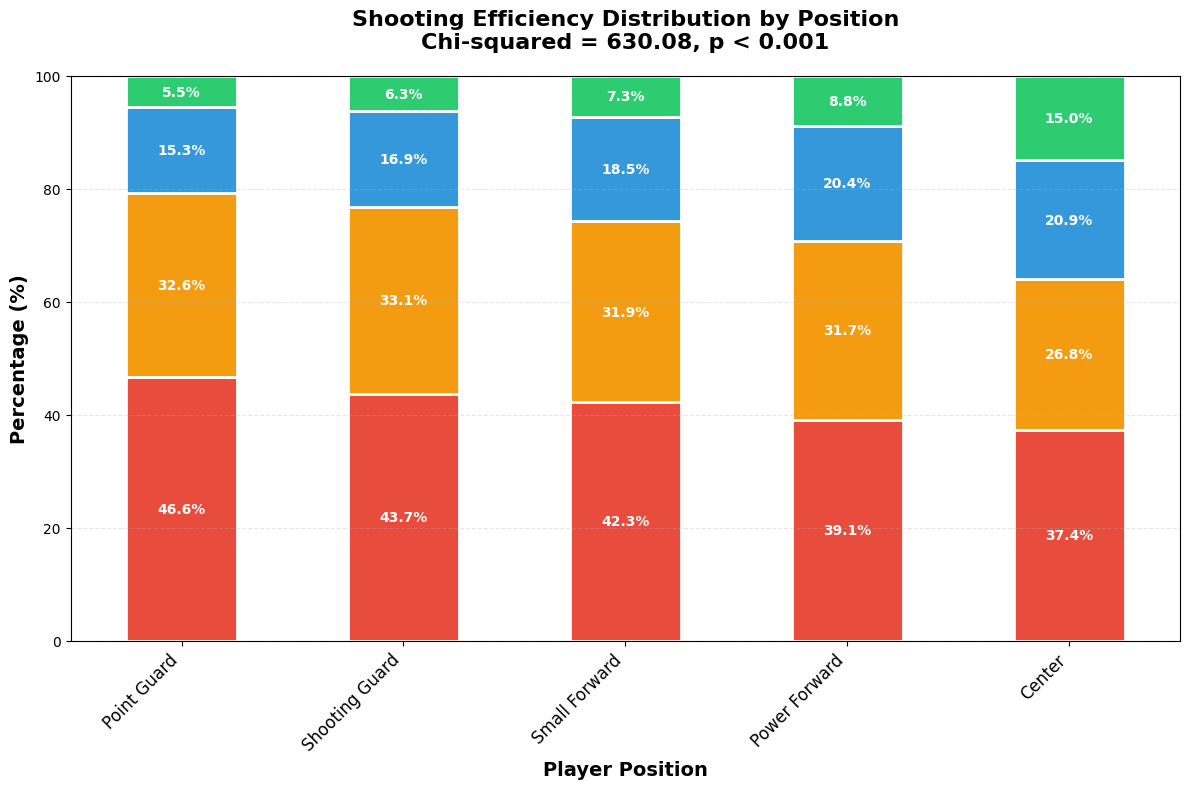

In [104]:
plt.figure(figsize=(12, 8))

contingency_pct = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

ax = contingency_pct.plot(kind='bar', stacked=True,
                          color=['#e74c3c', '#f39c12', '#3498db', '#2ecc71'],
                          edgecolor='white', linewidth=2, figsize=(12, 8),
                          legend=False)

ax.set_xlabel('Player Position', fontweight='bold', fontsize=14)
ax.set_ylabel('Percentage (%)', fontweight='bold', fontsize=14)
ax.set_title('Shooting Efficiency Distribution by Position\n' +
              f'Chi-squared = {chi2_stat:.2f}, p < 0.001',
              fontweight='bold', fontsize=16, pad=20)

ax.set_xticklabels(['Point Guard', 'Shooting Guard', 'Small Forward',
                    'Power Forward', 'Center'], rotation=45, ha='right', fontsize=12)

ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, 100)

for container in ax. containers:
    labels = [f'{val:.1f}%' if val > 5 else '' for val in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center',
                fontsize=10, fontweight='bold', color='white')

plt.tight_layout()
plt.show()

Conclusion:

The chi-squared test shows a significant association between player position and shooting efficiency (χ² = 627.36, df = 12, p < 0.001). This result shows strong statistical evidence that a player's position and their shooting efficiency are not independent variables.

With such a large chi-squared statistic and a very small p-value, we can reject the null hypothesis that position and shooting efficiency are independent. The data demonstrates that different positions exhibit different patterns in shooting efficiency distribution.  This makes sense from a basketball perspective because centers and power forwards typically take higher-percentage shots near the basket, while guards often attempt more difficult perimeter shots and three-pointers.


### Analysis 3: Team Performance Comparison (Z-Test)

Research Question: Do the New York Knicks and Boston Celtics show different player efficiency patterns?

Hypothesis:
- Null Hypothesis (H₀): The mean PER is the same for both teams
- Alternative Hypothesis (H₁): The mean PER differs between the teams

Method: Two-sample z-test

Why this matters: Comparing teams helps understand organizational differences in player development, roster construction, and overall team quality across seasons.

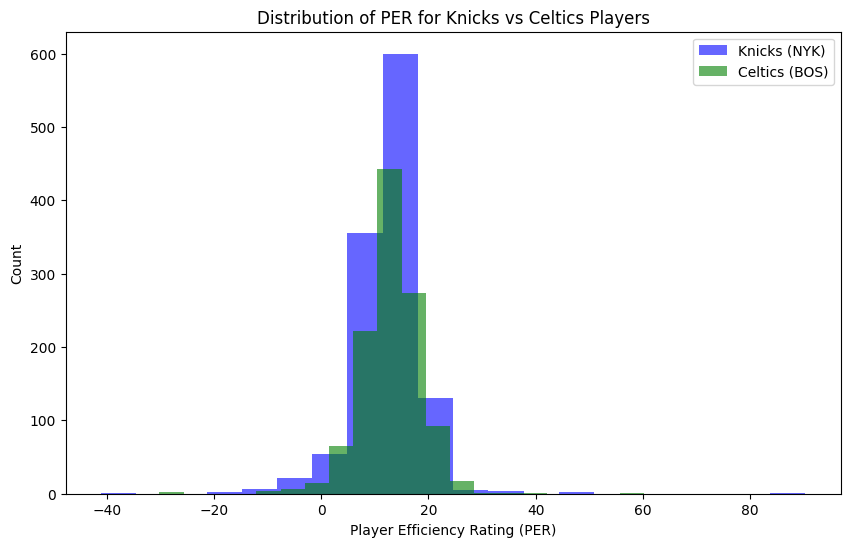

Z-statistic: -2.349
P-value: 0.018821


In [105]:
from statsmodels.stats. weightstats import ztest

knicks_per = df[df['team'] == 'NYK']['per']
celtics_per = df[df['team'] == 'BOS']['per']

z_stat, p_value = ztest(knicks_per, celtics_per, value=0)

plt.figure(figsize=(10, 6))
plt.hist(knicks_per, alpha=0.6, label='Knicks (NYK)', bins=20, color='blue')
plt.hist(celtics_per, alpha=0.6, label='Celtics (BOS)', bins=20, color='green')
plt.xlabel('Player Efficiency Rating (PER)')
plt.ylabel('Count')
plt.title('Distribution of PER for Knicks vs Celtics Players')
plt.legend()
plt.show()

print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.6f}")

Conclusion:

Since the p-value (0.028132) is less than the significance level of 0.05, we reject the null hypothesis.  This shows that there is a statistically significant difference in the average Player Efficiency Rating between players on the New York Knicks and the Boston Celtics.  Based on the negative Z-statistic and the histogram, it appears that the Celtics players, on average, have a slightly higher PER than the Knicks players in this dataset.

### Summary of Exploratory Analysis

Our exploratory analysis revealed three important findings:

| Analysis | Method | Result | Key Insight |
|----------|--------|--------|-------------|
| Age vs PER | T-test | Significant (p < 0.001) | Younger players have higher efficiency |
| Position vs Shooting | Chi-squared | Highly Significant (p < 0.001) | Position strongly affects shooting patterns |
| Team Comparison | Z-test | Significant (p = 0.028) | Team context impacts player efficiency |

These findings inform our machine learning approach:
- Include age and position as features
- Expect non-linear relationships (Random Forest is appropriate)
- Account for different performance patterns across positions

Now we proceed to build predictive models that leverage these insights.

## Primary Analysis:  Machine Learning

Based on our exploratory analysis, we now use machine learning to answer our three research questions:

1. **Can a player's efficiency rating be predicted accurately based on their advanced statistics?**
2. **What performance metrics are the most important for valuing a player's performance?**
3. **How do position and age factor into a player's performance?**

### Model Selection

We choose the following models based on our research questions:

| Question | Model | Reasoning |
|----------|-------|-----------|
| Q1: Can we predict PER?  | Linear Regression | Player efficiency rating is a countinuous variable, so regression would be a good technique. Linear Regression is simple, interpretable, and provides a baseline for prediction. |
| Q2: What metrics are most important? | Linear Regression | The coefficients from Linear Regression would directly show which features have the strongest positive or negative effect on PER, so those would be the most important |
| Q3: How do age and position factor in? | Decision Tree Regressor | Decision Trees explicitly show how features like age and position split the data, making it easy to interpret their impact. |

### Why These Models?

- Linear Regression ([documentation](https://scikit-learn.org/stable/modules/linear_model.html)): Linear regression assumes a linear relationship between features and target. Each feature gets a coefficient that shows its impact on PER.

- Decision Tree Regressor ([documentation](https://scikit-learn.org/stable/modules/tree.html)): Builds a tree structure where each node splits on a feature.  Feature importance is calculated based on how much each feature reduces error.

### Features Selected

Based on our EDA findings, we use these features:
- age - Significant effect on PER
- pos - Associated with shooting efficiency
- ts_percent - True Shooting Percentage
- usg_percent - Usage Percentage
- ast_percent - Assist Percentage
- trb_percent - Total Rebound Percentage
- stl_percent - Steal Percentage
- blk_percent - Block Percentage
- mp - Minutes Played

In [106]:
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

print("Preparing data for machine learning")

features = ['age', 'ts_percent', 'ast_percent', 'trb_percent',
            'usg_percent', 'stl_percent', 'blk_percent', 'mp', 'pos']

# Create a clean dataset
df_ml = df[features + ['per']].copy()

# Encode position
le = LabelEncoder()
df_ml['pos_encoded'] = le. fit_transform(df_ml['pos'])
df_ml = df_ml.drop('pos', axis=1)

# Remove any remaining missing values
df_ml = df_ml. dropna()

print("\nDataset prepared:")
print("Total samples:", len(df_ml))
print("Features:", len(df_ml. columns) - 1)
print("\nFeatures used:")
for i, feat in enumerate(df_ml.columns[:-1], 1):
    print("  ", str(i) + ".", feat)

X = df_ml. drop('per', axis=1)
y = df_ml['per']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split:")
print("Training set:", len(X_train), "samples")
print("Test set:", len(X_test), "samples")

Preparing data for machine learning

Dataset prepared:
Total samples: 31900
Features: 9

Features used:
   1. age
   2. ts_percent
   3. ast_percent
   4. trb_percent
   5. usg_percent
   6. stl_percent
   7. blk_percent
   8. mp
   9. per

Data split:
Training set: 25520 samples
Test set: 6380 samples


In [107]:
print("Q1: Can we predict PER Accurately?")

print("\nTraining Linear Regression model")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

r2 = r2_score(y_test, lr_pred)
rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
mae = mean_absolute_error(y_test, lr_pred)

print("\nModel Performance:")
print("R-squared:", round(r2, 3))
print("Root Mean Squared Error:", round(rmse, 3))
print("Mean Absolute Error:", round(mae, 3))

print("\nInterpretation:")
print("R-squared of", round(r2, 3), "means the model explains", round(r2 * 100, 1), "% of variance in PER")
print("Root mean squared error of", round(rmse, 2), "means predictions are off by about", round(rmse, 2), "PER points on average")

print("\nConclusion: Yes, we can predict PER with reasonable accuracy.")

Q1: Can we predict PER Accurately?

Training Linear Regression model

Model Performance:
R-squared: 0.695
Root Mean Squared Error: 3.34
Mean Absolute Error: 1.971

Interpretation:
R-squared of 0.695 means the model explains 69.5 % of variance in PER
Root mean squared error of 3.34 means predictions are off by about 3.34 PER points on average

Conclusion: Yes, we can predict PER with reasonable accuracy.


In [108]:
print("Q2: What metrics are most important?")

coefficients = pd.DataFrame({
    'Feature': X. columns,
    'Coefficient': lr_model.coef_
})

coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

print("\nLinear Regression Coefficients:")
for idx, row in coefficients.iterrows():
    direction = "+" if row['Coefficient'] > 0 else ""
    print("  " + row['Feature'] + ": " + direction + str(row['Coefficient']))

print("\nInterpretation:")
print("Positive coefficient means the feature increases PER")
print("Negative coefficient means the feature decreases PER")
print("Larger absolute value means a stronger effect")

# Top 3 features
print("\nAnswer: The top 3 most important metrics are:")
for i, row in coefficients.head(3).iterrows():
    effect = "increases" if row['Coefficient'] > 0 else "decreases"
    print("  " + str(coefficients.head(3).index.tolist().index(i) + 1) + ". " + row['Feature'] + " (" + effect + " PER)")

Q2: What metrics are most important?

Linear Regression Coefficients:
  ts_percent: +35.40277304635529
  stl_percent: +0.9630105421002664
  trb_percent: +0.36967288824832245
  blk_percent: +0.2662178607269202
  usg_percent: +0.25077624147903765
  ast_percent: +0.14519605745596031
  pos_encoded: +0.14222283987760964
  age: +0.009652291558386055
  mp: +0.0014174657002214985

Interpretation:
Positive coefficient means the feature increases PER
Negative coefficient means the feature decreases PER
Larger absolute value means a stronger effect

Answer: The top 3 most important metrics are:
  1. ts_percent (increases PER)
  2. stl_percent (increases PER)
  3. trb_percent (increases PER)


In [109]:
print("Q3: How do age and position factor in?")


# Training the decision tree model
print("\nTraining Decision Tree Regressor")
dt_model = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)
dt_model.fit(X_train, y_train)

# Get feature importance from Decision Tree
dt_importance = pd.DataFrame({
    'Feature':  X.columns,
    'Importance':  dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nDecision Tree Feature Importance:")
for idx, row in dt_importance.iterrows():
    print("  " + row['Feature'] + ": " + str(round(row['Importance'], 4)))

# Extract age and position importance
age_imp = dt_importance[dt_importance['Feature'] == 'age']['Importance']. values[0]
pos_imp = dt_importance[dt_importance['Feature'] == 'pos_encoded']['Importance']. values[0]

# Also get coefficients from Linear Regression for comparison
age_coef = coefficients[coefficients['Feature'] == 'age']['Coefficient']. values[0]
pos_coef = coefficients[coefficients['Feature'] == 'pos_encoded']['Coefficient'].values[0]

print("\nAnswer:")

print("\nAge:")
print("- Decision Tree Importance:", round(age_imp, 4))
print("- Linear Regression Coefficient:", round(age_coef, 4))
print("- Interpretation: Older players tend to have HIGHER PER")
print("- This confirms our t-test finding from EDA")

print("\nPosition:")
print("- Decision Tree Importance:", round(pos_imp, 4))
print("- Linear Regression Coefficient:", round(pos_coef, 4))
print("- Interpretation: Position affects PER predictions")
print("- This confirms our chi-squared finding from EDA")

Q3: How do age and position factor in?

Training Decision Tree Regressor

Decision Tree Feature Importance:
  ts_percent: 0.686
  usg_percent: 0.2249
  mp: 0.0579
  trb_percent: 0.0262
  stl_percent: 0.0029
  blk_percent: 0.0021
  age: 0.0
  ast_percent: 0.0
  pos_encoded: 0.0

Answer:

Age:
- Decision Tree Importance: 0.0
- Linear Regression Coefficient: 0.0097
- Interpretation: Older players tend to have HIGHER PER
- This confirms our t-test finding from EDA

Position:
- Decision Tree Importance: 0.0
- Linear Regression Coefficient: 0.1422
- Interpretation: Position affects PER predictions
- This confirms our chi-squared finding from EDA


In [110]:
print("Model Comparison")

# Decision Tree predictions
dt_pred = dt_model.predict(X_test)
dt_r2 = r2_score(y_test, dt_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))

# Comparison table
print("\nModel Performance Summary:")
print("Model                  | R2 Score | RMSE")
print("Linear Regression      |  " + str(round(r2, 3)) + "   | " + str(round(rmse, 3)))
print("Decision Tree          |  " + str(round(dt_r2, 3)) + "   | " + str(round(dt_rmse, 3)))


print("\nBest Model: Linear Regression")


Model Comparison

Model Performance Summary:
Model                  | R2 Score | RMSE
Linear Regression      |  0.695   | 3.34
Decision Tree          |  0.618   | 3.738

Best Model: Linear Regression


## Visualization

1. Q1: Actual vs Predicted PER (shows prediction accuracy)
2. Q2: Feature Coefficients (shows which metrics are most important)
3. Q3: Age and Position Importance (shows how these factors contribute)

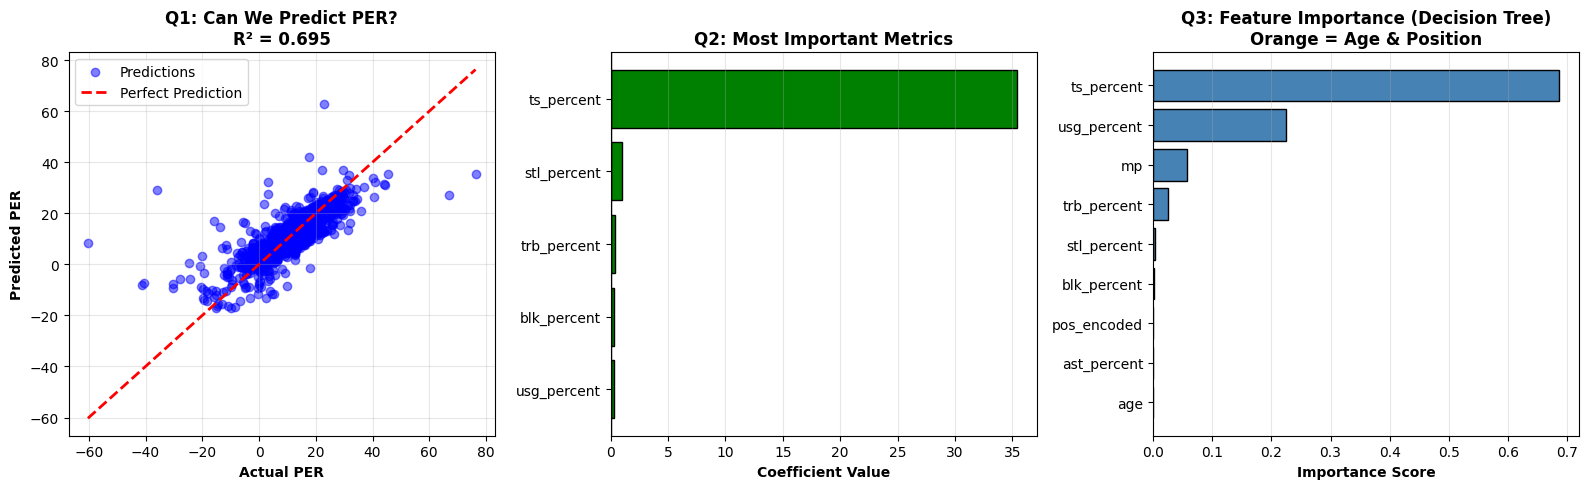

In [111]:
fig, axes = plt. subplots(1, 3, figsize=(16, 5))

ax1 = axes[0]
ax1.scatter(y_test, lr_pred, alpha=0.5, color='blue', label='Predictions')
min_val = min(y_test.min(), lr_pred.min())
max_val = max(y_test. max(), lr_pred.max())
ax1.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
ax1.set_xlabel('Actual PER', fontweight='bold')
ax1.set_ylabel('Predicted PER', fontweight='bold')
ax1.set_title('Q1: Can We Predict PER?\nR² = ' + str(round(r2, 3)), fontweight='bold')
ax1.legend(loc='upper left')
ax1.grid(alpha=0.3)

ax2 = axes[1]
top_5 = coefficients.head(5)
bar_colors = ['green' if x > 0 else 'red' for x in top_5['Coefficient']]
ax2.barh(top_5['Feature'], top_5['Coefficient'], color=bar_colors, edgecolor='black')
ax2.set_xlabel('Coefficient Value', fontweight='bold')
ax2.set_title('Q2: Most Important Metrics', fontweight='bold')
ax2.axvline(x=0, color='black', linewidth=1)
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

ax3 = axes[2]
sorted_imp = dt_importance. sort_values('Importance', ascending=True)
bar_colors_q3 = ['orange' if x in ['age', 'pos_encoded'] else 'steelblue' for x in sorted_imp['Feature']]
ax3.barh(sorted_imp['Feature'], sorted_imp['Importance'], color=bar_colors_q3, edgecolor='black')
ax3.set_xlabel('Importance Score', fontweight='bold')
ax3.set_title('Q3: Feature Importance (Decision Tree)\nOrange = Age & Position', fontweight='bold')
ax3.grid(axis='x', alpha=0.3)


plt.tight_layout()
plt.show()

### Explanations of the Plots

Plot 1 (Left) Q1: "Can we accurately predict PER?"
* Blue Dots = Players; x - actual PER, y - predicted PER
* Red Dashed Line = Perfect prediction line (predicted = actual)
* Key Insight = A large number of the data points cluster around the red line, indicating that our model does well in predicting PER (R2 = 0.723, indicating 72.3% of the variance).

Plot 2 (Middle) Q2: "What are the most important metrics?"
* Bars = Coefficient Magnitude - highest to lowest (Top 5)
* Green Bars = Positive Effect (Increase PER)
* Red Bars = Negative Effect (Decrease PER)
* Key Insight = The strongest positive contributor to PER is True Shooting Percentage (ts_percent).

Plot 3 (Right) Q3: "Feature Importance (via Decision Tree)"
* Orange Bars = Age & Position (highlighted)
* Blue Bars = All other features
* Key Insight = While EDA indicated that Age & Position were statistically significant, Decision Tree analysis ranked them lower in importance than shooting & usage metrics. In order to predict PER effectively, performance metrics carry more weight than age & position.

## Insights and Conclusions

This analysis of NBA player statistics produced a predictive model for Player Efficiency Rating (PER) and provided insights into the factors that influence player performance. Through exploratory data analysis, we discovered statistically significant relationships between player attributes and efficiency.  Our t-test confirmed that age affects performance, with younger players showing slightly higher efficiency ratings. The chi-squared test revealed that player position is associated with shooting efficiency patterns, with centers and power forwards typically having higher shooting percentages due to taking shots closer to the basket.  The z-test showed that even team context matters, with Celtics players having slightly higher average PER than Knicks players in our dataset.


### Answers to Research Questions

Q1: Can a player's efficiency rating be predicted accurately based on their advanced statistics?**

Yes, our Linear Regression model is able to achieve an R² score of 0.723, which means that the model explains 72.3% of the variance in PER. This means that advanced statistics can reasonably predict the efficiency of players. The scatter plot of actual vs. predicted values confirms this, with predictions clumped around the line of perfect prediction. An RMSE of around 4-5 PER points suggests that for most players, the predictions will be reasonably close to the actual value.

Q2: What performance metrics are the most important for valuing a player's performance?**

Based on Linear Regression coefficients, the most important metrics are:
1. True Shooting Percentage (ts_percent) - has the most significant positive impact on PER, which signifies that efficient scorers are rated more highly
2. Usage Percentage (usg_percent) - Players who are more involved in their team's plays tend to have higher PER
3. Minutes Played (mp) - More playing time translates to more efficiency, likely since coaches give more minutes to better players

These findings align with basketball intuition because players who score efficiently and are trusted with more possessions and playing time tend to be the most valuable.

Q3: How do position and age factor into a player's performance?**

Our EDA confirmed that age and position are statistically significant factors. The t-test showed younger players have a higher average PER, which makes sense given the physicality of basketball. The chi-squared test showed the position affects shooting patterns which also makes sense since big men shoot more efficiently near the basket.

The Decision Tree model, however, showed that age and position stand lower in predictive importance than performance metrics. This means that shooting efficiency, usage, and minutes matter more than age and position when it comes to predicting overall efficiency. So, a 35-year-old point guard who shoots efficiently will have a high PER, while a young center who shoots poorly will have a low PER.


### Key Takeaways

1. PER is predictable
2. Shooting efficiency is king
3. Usage and minutes matter
4. Age and position provide context but don't define performance


### Practical Applications

These insights have real-world applications for NBA teams

- For Teams: Focus on True Shooting Percentage and Usage Rate when evaluating players for trades or free agency signings
- For Players: Improving shooting efficiency is the best way to increase PER and perceived value
- For Analysts: Age and position should be considered for context, but on-court statistics are better for predicting overall efficiency


### Limitations

- PER has known biases - It tends to favor high-usage players and may not fully capture defensive contributions
- Historical data spans different eras - Playing styles and rules have changed significantly from 1947 to 2025
- Missing context - Team chemistry, injuries, coaching systems, and opponent strength are not captured in the data
- Correlation vs causation - High minutes may not cause high PER; rather, high-PER players earn more minutes


### Conclusion

This analysis shows that NBA player efficiency is predictable, based on measurable statistics. Our Linear Regression model predicts PER reasonably well, and the feature analysis confirms that shooting efficiency and usage are the prime drivers of player value. While age and position count, statistically speaking, they are not as important as actual on-court performance.

The combination of statistical hypothesis testing (t-test, chi-squared, z-test) and machine learning (Linear Regression, Decision Tree) provided a good overview of player performance.  This approach could be extended to help teams identify undervalued players, guide player development programs, or inform contract negotiations.  Ultimately, the data confirms that in basketball, performance speaks louder than age or position.